# Домашние задание

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градинеты с тем, как считает PyTorch AutoGrad.

# Данные

In [53]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [54]:
x = np.arange(-10, 10, 0.01).reshape(-1, 1)
y = x**2 * np.sin(x).reshape(-1, 1)

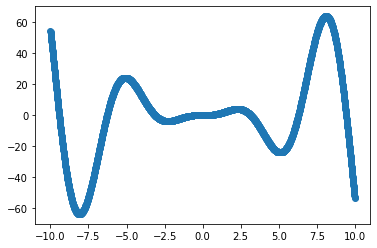

In [56]:
plt.scatter(x, y)

In [ ]:
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

# Ручные градиенты

In [107]:
# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)
b1 = torch.randn(hidden_size, device=device, dtype=dtype)

In [108]:
learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    #TODO
    h1 = x.mm(w1)+b1
    h1_relu = torch.nn.functional.relu(h1)
    y_pred = h1.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).mean().item()
    if t % 100 == 0:
        print(t, loss)

0 3158.02587890625
100 3158.02587890625
200 3158.02587890625
300 3158.02587890625
400 3158.02587890625


# Torch AutogGrad

In [94]:
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype, requires_grad=True)
b1 = torch.randn(hidden_size, device=device, dtype=dtype, requires_grad=True)



import torch.optim as optim

loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam([w1, w2, b1], lr=learning_rate)

for t in range(50000):
    optimizer.zero_grad()
    
    h1 = x.mm(w1)+b1
    h_relu = torch.relu(h1)
    y_pred = h_relu.mm(w2)
    
    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print(t, loss.item())
    
    loss.backward()
   
    optimizer.step()

0 708.8270874023438
1000 489.7561340332031
2000 334.5953674316406
3000 297.0195617675781
4000 294.4029541015625
5000 294.3643493652344
6000 294.363037109375
7000 294.3659362792969
8000 294.3638000488281
9000 294.36248779296875
10000 294.3625793457031
11000 294.3636474609375
12000 294.3645324707031
13000 294.3653259277344
14000 294.3634338378906
15000 294.3637390136719
16000 294.3623352050781
17000 294.3644714355469
18000 294.3697204589844
19000 294.3631286621094
20000 294.36480712890625
21000 294.36236572265625
22000 294.3647155761719
23000 294.36224365234375
24000 294.36224365234375
25000 294.362548828125
26000 294.3646240234375
27000 294.3635559082031
28000 294.3638916015625
29000 294.3622741699219
30000 294.3705749511719
31000 294.388916015625
32000 294.36328125
33000 294.3628234863281
34000 294.3627624511719
35000 294.3630676269531
36000 294.3622741699219
37000 294.3624267578125
38000 294.3626708984375
39000 294.3645324707031
40000 294.36236572265625
41000 294.36944580078125
42000 

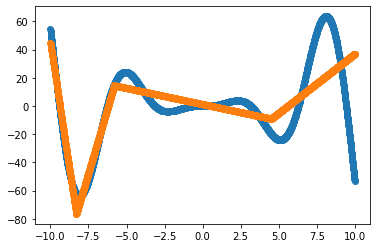

In [95]:
plt.scatter(x, y)
plt.scatter(x, y_pred.detach().numpy())

# nn.Module

In [101]:
from torch import nn
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        TwoLayerNet наследуется от nn.Module и тем самым полчаем возможность
        переопределять методы класса.
        В конструктуре создаем слои (обучаемые веса) и другие нужные перменные/функции,
        которые нужны для модели
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size, bias=False)
        self.linear2 = torch.nn.Linear(hidden_size, output_size, bias=False)

    def forward(self, x):
        """
        Метод forward отвечает за прямое распростронение модели, 
        поэтому данный метод нужно переопределять обязательно, 
        чтобы задать логику прямого распростронения. 
        Именно в этот момент начинает строится динамический граф
        """
        h_relu = torch.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        
        return y_pred
        

In [102]:
batch_size = 64
input_size = 1
hidden_size = 10
output_size = 1

model = TwoLayerNet(input_size, hidden_size, output_size)

loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for t in range(50000):
    y_pred_nn = model(x)

    loss = loss_fn(y_pred_nn, y)
    if t % 1000 == 0:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 791.2003173828125
1000 744.2737426757812
2000 703.1588134765625
3000 672.3887329101562
4000 653.5869750976562
5000 644.3731689453125
6000 640.7433471679688
7000 639.9283447265625
8000 639.8755493164062
9000 639.875
10000 639.8751220703125
11000 639.8751220703125
12000 639.8751220703125
13000 639.8751220703125
14000 639.8751220703125
15000 639.8751220703125
16000 639.8750610351562
17000 639.8751220703125
18000 639.8751220703125
19000 639.8751220703125
20000 639.8751220703125
21000 639.8751220703125
22000 639.8750610351562
23000 639.8751220703125
24000 639.8751220703125
25000 639.8751220703125
26000 639.8751220703125
27000 639.8750610351562
28000 639.8751220703125
29000 639.8751220703125
30000 639.8751220703125
31000 639.8751220703125
32000 639.8750610351562
33000 639.8751220703125
34000 639.8750610351562
35000 639.8751220703125
36000 639.8751220703125
37000 639.8751220703125
38000 639.8751220703125
39000 639.8751220703125
40000 639.8751220703125
41000 639.8751220703125
42000 639.87506

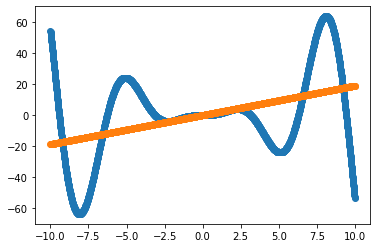

In [103]:
plt.scatter(x, y)
plt.scatter(x, y_pred_nn.detach().numpy())